In [65]:
import numpy as np
# import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import datetime
from datetime import datetime
import dateutil
import os
import calendar
warnings.filterwarnings(action='ignore')
# import pymannkendall as mk
import itertools
import os
import math

In [11]:
ds_pr = xr.open_dataset('./data/nclimgrid-spei-gamma-01.nc')
ds_pr

<xarray.Dataset>
Dimensions:  (lat: 596, lon: 1385, time: 1552)
Coordinates:
  * lat      (lat) float32 24.56 24.6 24.65 24.69 ... 49.23 49.27 49.31 49.35
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
  * time     (time) datetime64[ns] 1895-01-01 1895-02-01 ... 2024-04-01
Data variables:
    spei_01  (time, lat, lon) float32 ...
Attributes: (12/16)
    date_created:              2024-05-04  06:11:41
    date_modified:             2024-05-04  06:11:41
    title:                     SPEI/Gamma 1-month values computed by NIDIS/NC...
    source:                    NIDIS/NCEI/NOAA
    summary:                   SPEI/Gamma 1-month values computed by NIDIS/NC...
    institution:               National Centers for Environmental Information...
    ...                        ...
    geospatial_lat_min:        24.5625
    geospatial_lat_max:        49.354168
    geospatial_lon_min:        -124.6875
    geospatial_lon_max:        -67.020836
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east

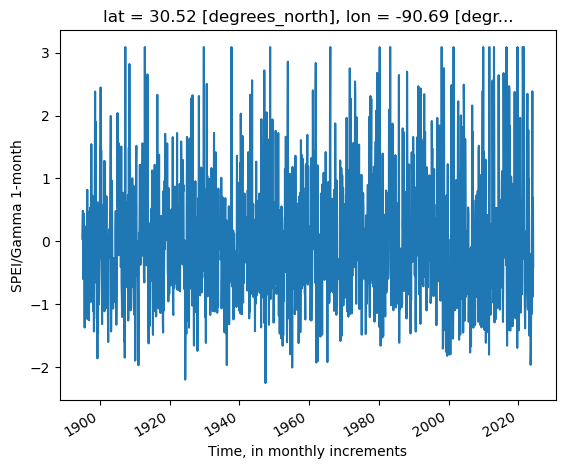

In [68]:
sp = ds_pr.spei_01
sp.sel(lat=30.5, lon=-90.7, method='nearest').plot()
# max(sp.sel(lat=30.5, lon=-90.7, method='nearest'))

In [63]:
sp[0]

<xarray.DataArray 'spei_01' (lat: 596, lon: 1385)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 24.56 24.6 24.65 24.69 ... 49.23 49.27 49.31 49.35
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
    time     datetime64[ns] 1895-01-01
Attributes:
    calibration_start_year:  1895
    calibration_end_year:    2014
    valid_min:               -3.09
    valid_max:               3.09
    cell_methods:            time: standard_deviation (SPEI at 1 month scale)
    long_name:               SPEI/Gamma 1-month
    standard_name:           SPEI/Gamma 1-month

In [59]:
temp = sp.sel(time='1895-03-01')
notNan = np.where(temp!='nan')
count = 0
for i in temp:
    if i.any()!='nan':
        print("#############",i)
        inCount=0
        for j in i:
            if j!='nan':
                print("----------->",j,"^^^^^", inCount)
                break
            inCount+=1
    count+=1
    # print(i[0])

############# <xarray.DataArray 'spei_01' (lon: 1385)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    lat      float32 24.56
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
    time     datetime64[ns] 1895-03-01
Attributes:
    calibration_start_year:  1895
    calibration_end_year:    2014
    valid_min:               -3.09
    valid_max:               3.09
    cell_methods:            time: standard_deviation (SPEI at 1 month scale)
    long_name:               SPEI/Gamma 1-month
    standard_name:           SPEI/Gamma 1-month
-----------> <xarray.DataArray 'spei_01' ()>
array(nan, dtype=float32)
Coordinates:
    lat      float32 24.56
    lon      float32 -124.7
    time     datetime64[ns] 1895-03-01
Attributes:
    calibration_start_year:  1895
    calibration_end_year:    2014
    valid_min:               -3.09
    valid_max:               3.09
    cell_methods:            time: standard_deviation (SPEI at 1 month scale)
 

In [37]:
for i in ds_pr.spei_01:
    print(i)

<xarray.DataArray 'spei_01' (lat: 596, lon: 1385)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 24.56 24.6 24.65 24.69 ... 49.23 49.27 49.31 49.35
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
    time     datetime64[ns] 1895-01-01
Attributes:
    calibration_start_year:  1895
    calibration_end_year:    2014
    valid_min:               -3.09
    valid_max:               3.09
    cell_methods:            time: standard_deviation (SPEI at 1 month scale)
    long_name:               SPEI/Gamma 1-month
    standard_name:           SPEI/Gamma 1-month
<xarray.DataArray 'spei_01' (lat: 596, lon: 1385)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., na

In [73]:
val = np.where(ds_pr.spei_01.valid_max!=3.09)
val, len(val)

((array([0]),), 1)

In [ ]:
def dfaamiFun(latG, lonG, timeG = None):
    speiForLatLon = sp.sel(lat=latG, lon=lonG, method='nearest')
    values = []
    for i in range(len(speiForLatLon)-1):
        dfaaIT = (speiForLatLon[i+1] - speiForLatLon[i])/2
        R = max(speiForLatLon) - min(speiForLatLon)
        weight = 1 + (abs(speiForLatLon[i+1] + speiForLatLon[i])/R)
        dfaami = dfaaIT*weight
        values.append(dfaami)
        print(values)
    return values
res = dfaamiFun(30.5,-90.7)
plt.plot(res)

[<xarray.DataArray 'spei_01' ()>
array(0.11938392)
Coordinates:
    lat      float32 30.52
    lon      float32 -90.69]
[<xarray.DataArray 'spei_01' ()>
array(0.11938392)
Coordinates:
    lat      float32 30.52
    lon      float32 -90.69, <xarray.DataArray 'spei_01' ()>
array(0.12500687)
Coordinates:
    lat      float32 30.52
    lon      float32 -90.69]
[<xarray.DataArray 'spei_01' ()>
array(0.11938392)
Coordinates:
    lat      float32 30.52
    lon      float32 -90.69, <xarray.DataArray 'spei_01' ()>
array(0.12500687)
Coordinates:
    lat      float32 30.52
    lon      float32 -90.69, <xarray.DataArray 'spei_01' ()>
array(-0.55529174)
Coordinates:
    lat      float32 30.52
    lon      float32 -90.69]
[<xarray.DataArray 'spei_01' ()>
array(0.11938392)
Coordinates:
    lat      float32 30.52
    lon      float32 -90.69, <xarray.DataArray 'spei_01' ()>
array(0.12500687)
Coordinates:
    lat      float32 30.52
    lon      float32 -90.69, <xarray.DataArray 'spei_01' ()>
array(-0.55